In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("/content/loan dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.shape

(614, 13)

In [6]:
df.Gender.value_counts(dropna=False)

,count
Gender,
Male,489
Female,112
NaN,13


<ipython-input-7-4a1861040e11>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="hls")


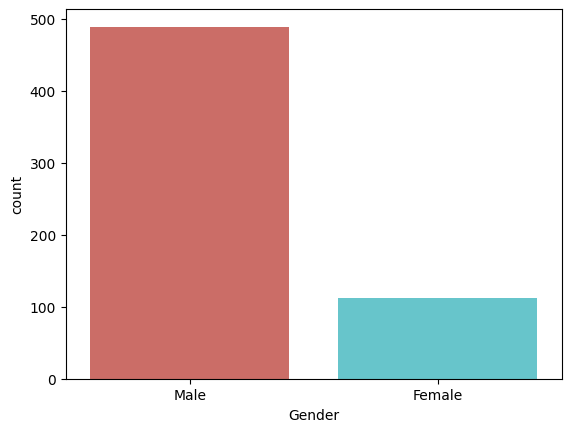

In [7]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [8]:
df.Married.value_counts(dropna=False)

,count
Married,
Yes,398
No,213
NaN,3


<ipython-input-9-98d68ac191b2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="Paired")


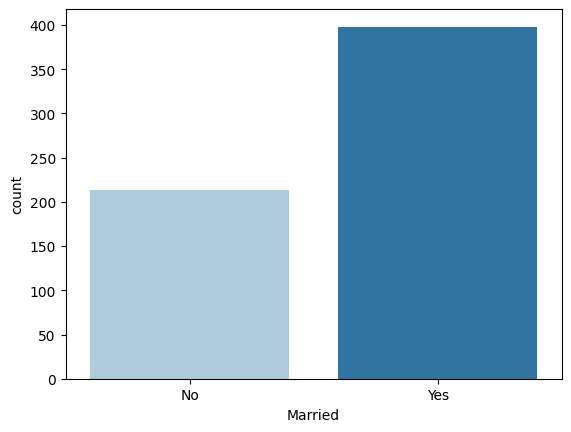

In [9]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

In [10]:
df.Education.value_counts(dropna=False)

,count
Education,
Graduate,480
Not Graduate,134


<ipython-input-11-8e9ea3c8e87a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="rocket")


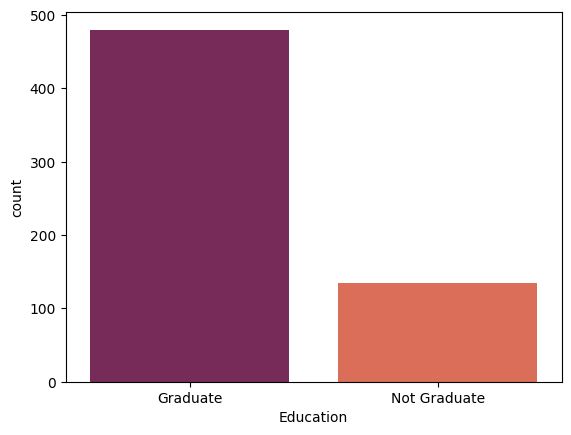

In [11]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [12]:
df.Self_Employed.value_counts(dropna=False)

,count
Self_Employed,
No,500
Yes,82
NaN,32


<ipython-input-13-283837bf1c2e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="crest")


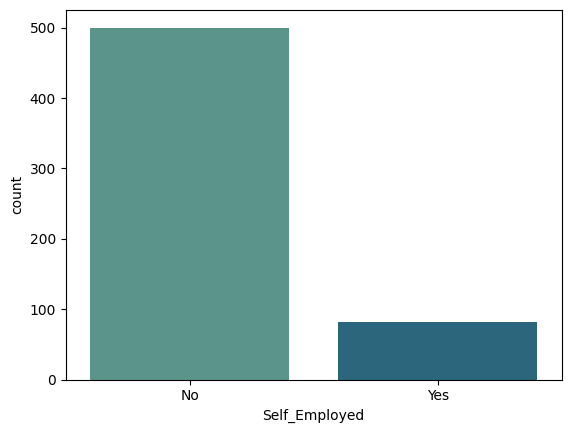

In [13]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [14]:
df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,475
0.0,89
NaN,50


<ipython-input-15-b2abd7acd8ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="viridis")


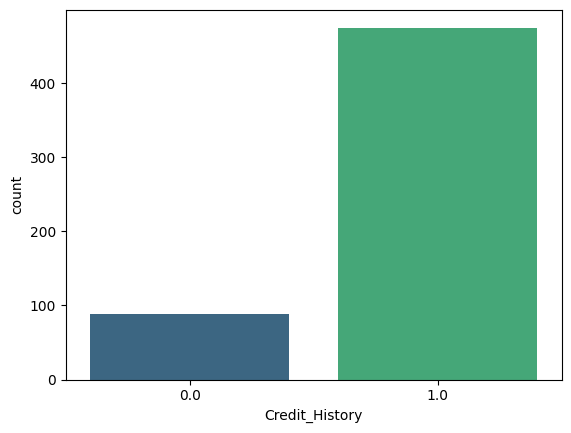

In [15]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [16]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


<ipython-input-17-3f0e29f42635>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="cubehelix")


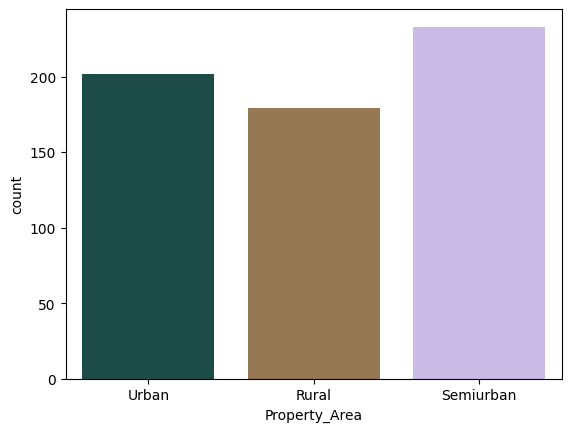

In [17]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [18]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,422
N,192


<ipython-input-19-06b98ed0a451>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")


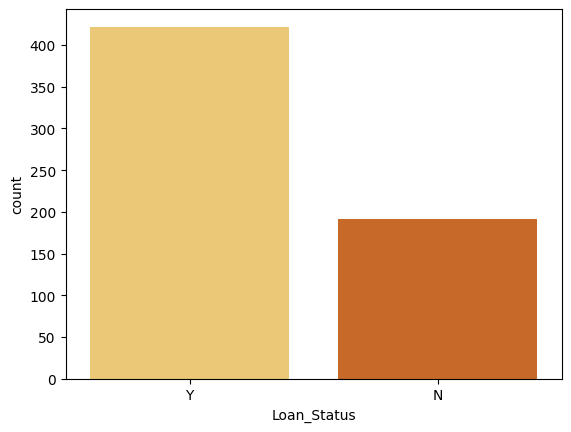

In [19]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [20]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


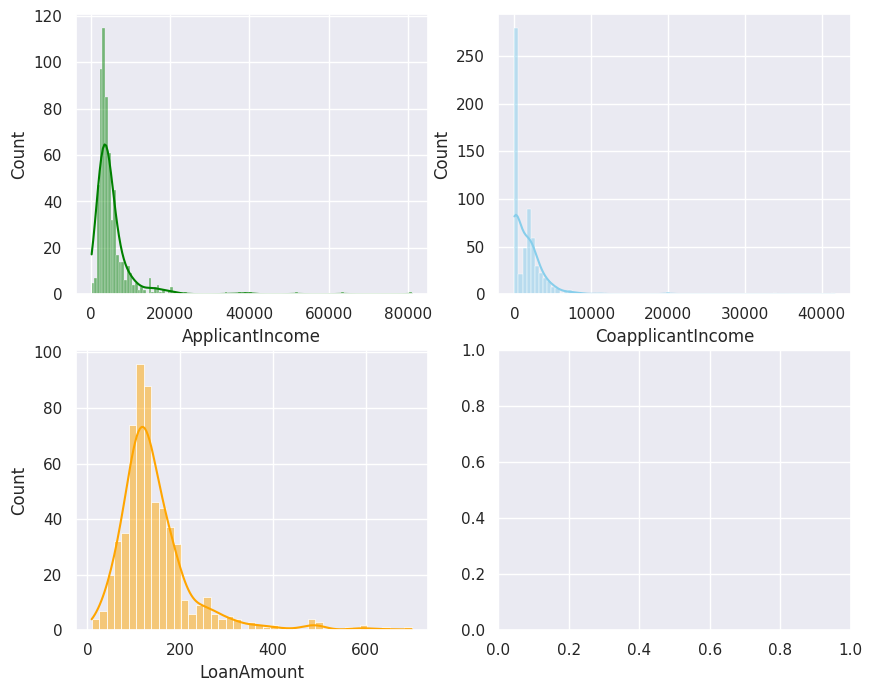

In [21]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

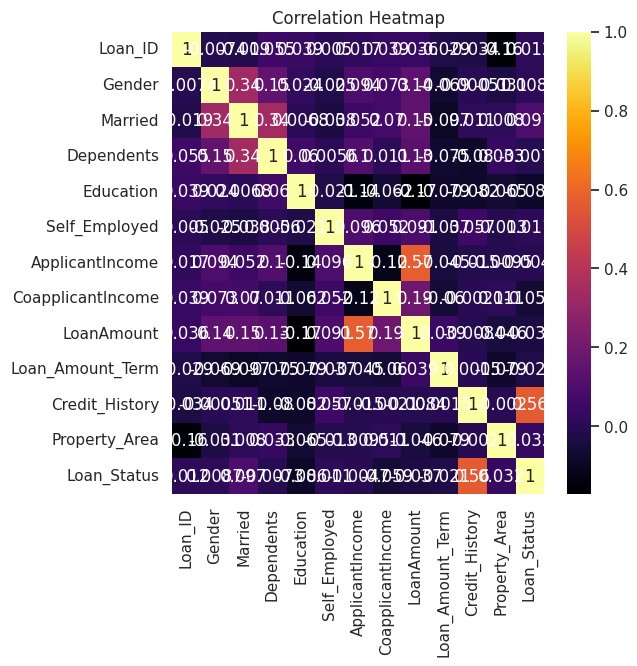

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode non-numeric columns, if necessary
for col in df.select_dtypes(include=['object']):
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 2: Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()


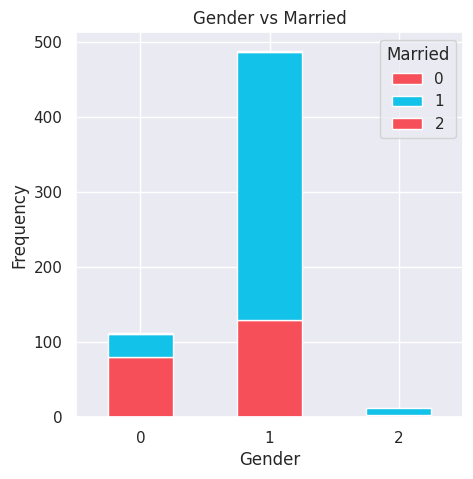

In [23]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

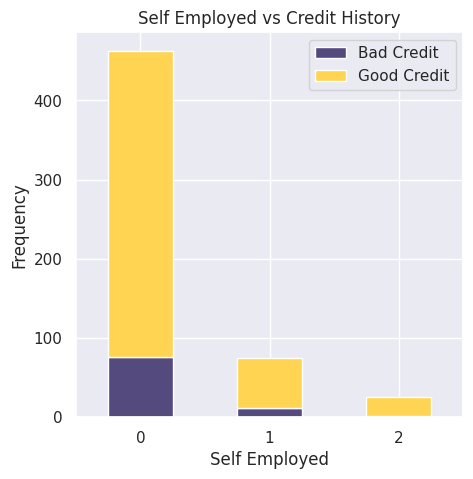

In [24]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

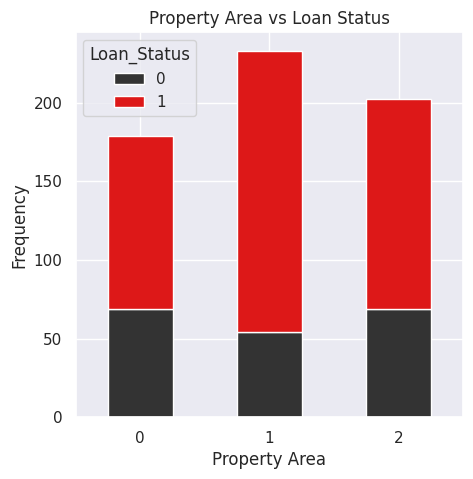

In [25]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<ipython-input-26-0a4d7fb48f1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


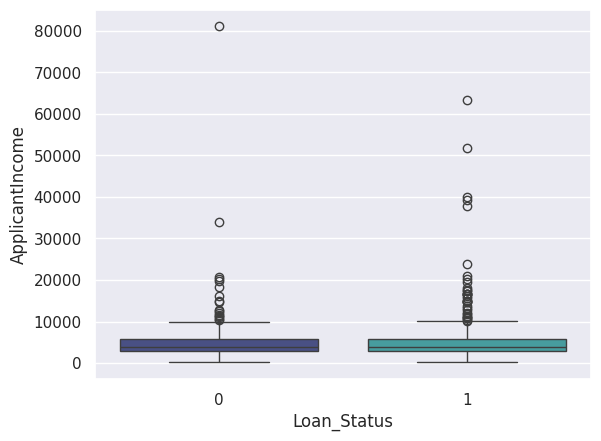

In [26]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

<ipython-input-27-e41ee8c4d05d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");


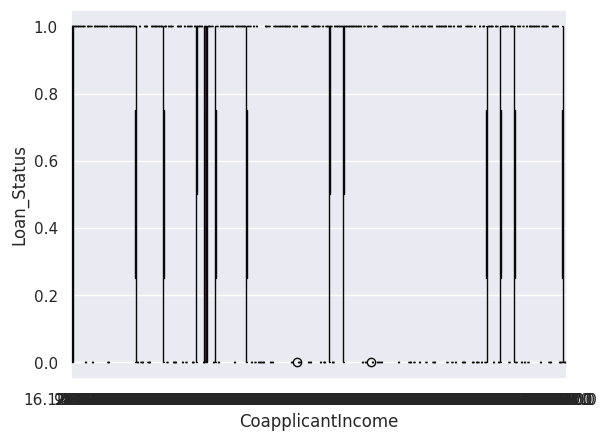

In [27]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

<ipython-input-28-7caa0fac4fb6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


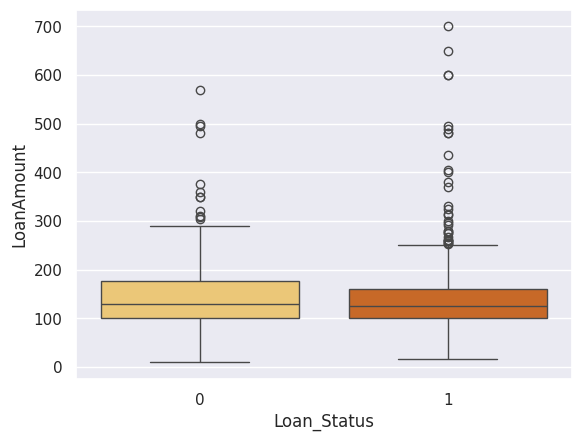

In [28]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

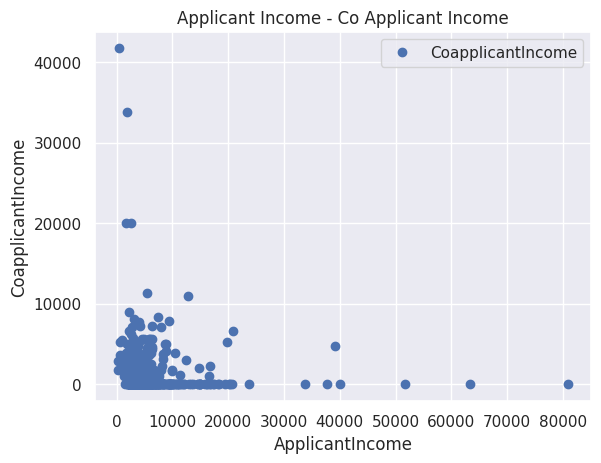

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [29]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

In [30]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [31]:
df = df.drop(['Loan_ID'], axis=1)


In [32]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

<ipython-input-32-a16f4fd21f84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
<ipython-input-32-a16f4fd21f84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [33]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

<ipython-input-33-5bf66dd7123b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


In [34]:
# Apply one-hot encoding
df = pd.get_dummies(df)

# Check the columns to ensure they exist before dropping
columns_to_drop = ['Gender_Female', 'Married_No', 'Education_Not Graduate',
                   'Self_Employed_No', 'Loan_Status_N']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the unnecessary columns
df = df.drop(columns_to_drop, axis=1)

# Rename columns for simplicity
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=new, inplace=True)

print("Updated dataframe columns:", df.columns)


Updated dataframe columns: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [35]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

In [36]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,12.100089,360.0,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1


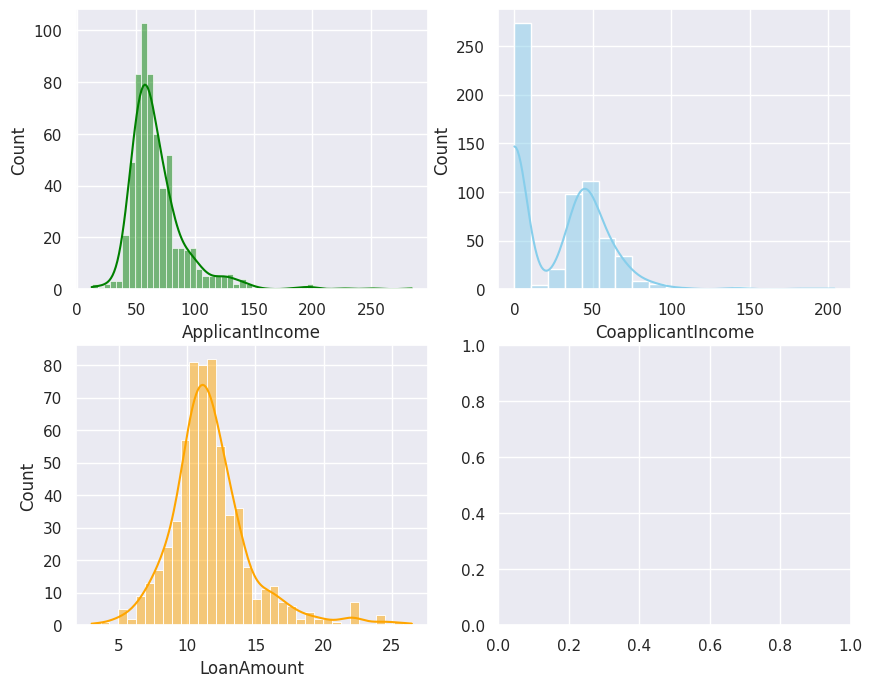

In [37]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [38]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [39]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.000000,12.100089,360.0,1.0,2
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2


In [40]:
X, y = SMOTE().fit_resample(X, y)

<ipython-input-41-464dc99333fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


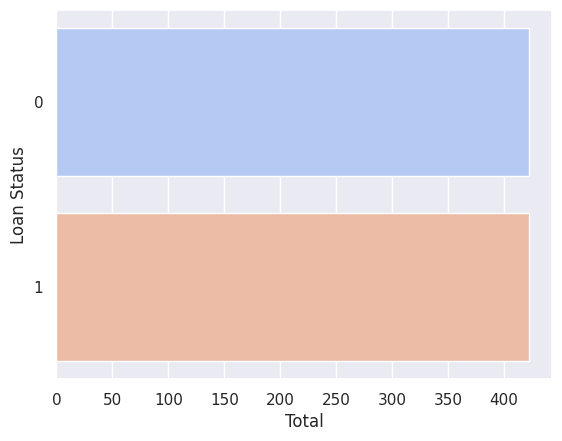

In [41]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [42]:
X = MinMaxScaler().fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

LINEAR REGRESSION

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)


R-squared: 0.2829813047861951
Mean Squared Error: 0.17919818796387166


LOGISTIC REGRESSION

In [46]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.85      0.60      0.71        86
           1       0.69      0.89      0.77        83

    accuracy                           0.75       169
   macro avg       0.77      0.75      0.74       169
weighted avg       0.77      0.75      0.74       169

[[52 34]
 [ 9 74]]
LR accuracy: 74.56%


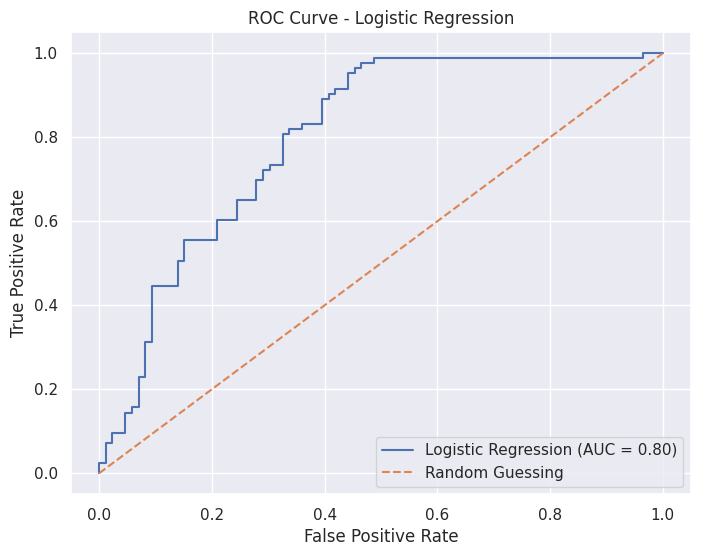

In [47]:
LR_probs = LRclassifier.predict_proba(X_test)
LR_probs = LR_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, LR_probs)

auc = roc_auc_score(y_test, LR_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

KNN K NEAREST NEIGHBOUR

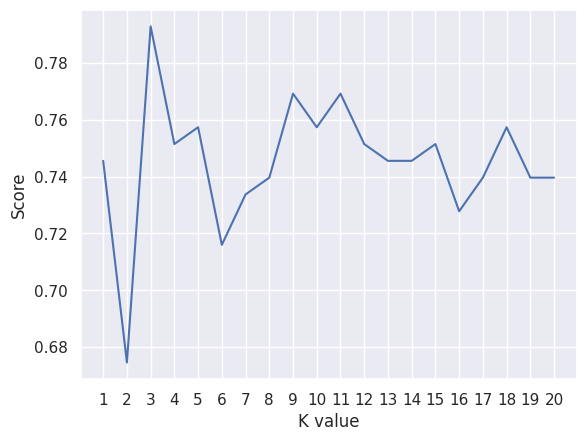

KNN best accuracy: 79.29%


In [48]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

SUPPORT VECTOR MACHINE SVM

In [49]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70        86
           1       0.68      0.90      0.78        83

    accuracy                           0.75       169
   macro avg       0.77      0.75      0.74       169
weighted avg       0.77      0.75      0.74       169

[[51 35]
 [ 8 75]]
SVC accuracy: 74.56%


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RANDOM FOREST

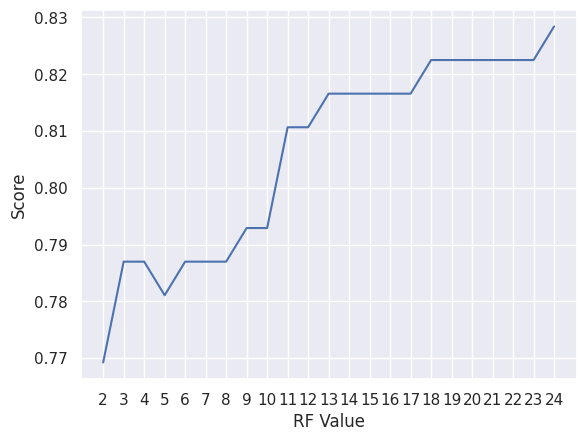

Random Forest Accuracy:  82.84%


In [50]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

DECISION TREE

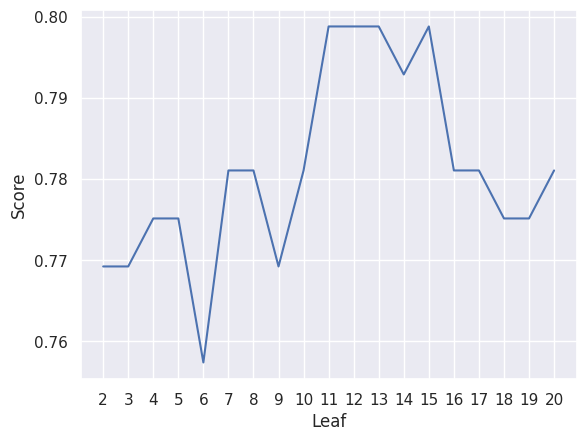

Decision Tree Accuracy: 79.88%


In [51]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [52]:
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Decision Tree']

accuracy_scores = [LRAcc * 100, KNAcc * 100, SVCAcc * 100, RFAcc * 100, DTAcc * 100]

precision_scores = [
    precision_score(y_test, LRclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, KNclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, SVCclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, RFclassifier.predict(X_test), average='weighted') * 100,
    precision_score(y_test, DTclassifier.predict(X_test), average='weighted') * 100
]
confusion_matrices = [
    confusion_matrix(y_test, LRclassifier.predict(X_test)),
    confusion_matrix(y_test, KNclassifier.predict(X_test)),
    confusion_matrix(y_test, SVCclassifier.predict(X_test)),
    confusion_matrix(y_test, RFclassifier.predict(X_test)),
    confusion_matrix(y_test, DTclassifier.predict(X_test))
]

summary_table = pd.DataFrame({
    'Model Name': model_names,
    'Accuracy (%)': accuracy_scores,
    'Precision (%)': precision_scores,
    'Confusion Matrix': confusion_matrices
})

print(summary_table)

               Model Name  Accuracy (%)  Precision (%)      Confusion Matrix
0     Logistic Regression     74.556213      77.030678   [[52, 34], [9, 74]]
1     K-Nearest Neighbors     79.289941      74.939932  [[56, 30], [14, 69]]
2  Support Vector Machine     74.556213      77.473309   [[51, 35], [8, 75]]
3           Random Forest     82.840237      85.530338   [[60, 26], [3, 80]]
4           Decision Tree     79.881657      79.086182  [[60, 26], [11, 72]]


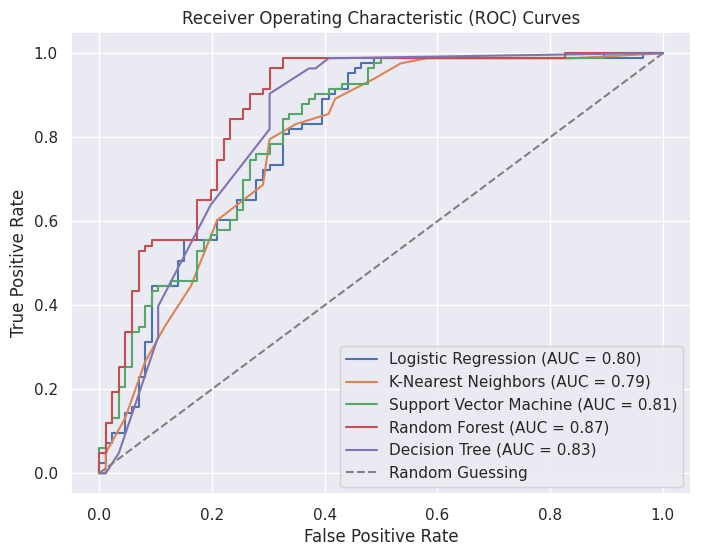

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [LRclassifier, KNclassifier, SVCclassifier, RFclassifier, DTclassifier]
classifier_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Decision Tree']

plt.figure(figsize=(8, 6))

for clf, name in zip(classifiers, classifier_names):
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:
        prob_pos = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, prob_pos)
    auc = roc_auc_score(y_test, prob_pos)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.show()

ANN

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5174 - loss: 0.6937 - val_accuracy: 0.5556 - val_loss: 0.6781
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5956 - loss: 0.6754 - val_accuracy: 0.6667 - val_loss: 0.6588
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6919 - loss: 0.6495 - val_accuracy: 0.7037 - val_loss: 0.6274
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.6209 - val_accuracy: 0.7111 - val_loss: 0.5900
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.5851 - val_accuracy: 0.7111 - val_loss: 0.5579
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7769 - loss: 0.5448 - val_accuracy: 0.7333 - val_loss: 0.5261
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7393 - loss: 0.5505 - val_accuracy: 0.7333 - val_loss: 0.5102
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7635 - loss: 0.5000 - val_accuracy: 0.7704 - val_loss: 0.4879
Ep

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def get_user_input():
    print("Enter the required features for loan prediction:")
    try:
        applicant_income = float(input("Applicant's Income: "))
        coapplicant_income = float(input("Coapplicant's Income: "))
        loan_amount = float(input("Loan Amount: "))
        loan_amount_term = float(input("Loan Amount Term (in months): "))
        credit_history = float(input("Credit History (1 for Yes, 0 for No): "))
        gender = int(input("Gender (1 for Male, 0 for Female): "))
        married = int(input("Married (1 for Yes, 0 for No): "))
        dependents = int(input("Number of Dependents (0, 1, 2, 3 or more): "))
        education = int(input("Education (1 for Graduate, 0 for Not Graduate): "))
        self_employed = int(input("Self Employed (1 for Yes, 0 for No): "))
        property_area = input("Property Area (Rural, Semiurban, Urban): ").lower()

        # Encode Property Area as a single feature (0 = Rural, 1 = Semiurban, 2 = Urban)
        if property_area == "rural":
            property_area_encoded = 0
        elif property_area == "semiurban":
            property_area_encoded = 1
        elif property_area == "urban":
            property_area_encoded = 2
        else:
            print("Invalid Property Area. Please enter 'Rural', 'Semiurban', or 'Urban'.")
            return None

        # Return input array
        return np.array([[applicant_income, coapplicant_income, loan_amount, loan_amount_term,
                          credit_history, gender, married, dependents, education,
                          self_employed, property_area_encoded]])

    except ValueError:
        print("Invalid input. Please enter numeric values where required.")
        return None

def predict_loan_status(user_input):
    if user_input is None:
        return None

    # Assuming X_train and y_train are defined
    KNclassifier = KNeighborsClassifier(n_neighbors=5)
    KNclassifier.fit(X_train, y_train)

    prediction = KNclassifier.predict(user_input)
    return prediction

# Collect user input
user_features = get_user_input()

# Ensure the input feature count matches the trained model
if user_features is not None and user_features.shape[1] != 11:
    print(f"Error: Input has {user_features.shape[1]} features, but the model expects 11 features.")
else:
    # Make prediction
    prediction = predict_loan_status(user_features)

    # Display result
    if prediction is not None:
        if prediction[0] == 1:
            print("Loan Status: Paid")
        else:
            print("Loan Status: Not Paid")


Enter the required features for loan prediction:
Applicant's Income: 80000
Coapplicant's Income: 20000
Loan Amount: 300000
Loan Amount Term (in months): 24
Credit History (1 for Yes, 0 for No): 1
Gender (1 for Male, 0 for Female): 0
Married (1 for Yes, 0 for No): 1
Number of Dependents (0, 1, 2, 3 or more): 1
Education (1 for Graduate, 0 for Not Graduate): 1
Self Employed (1 for Yes, 0 for No): 0
Property Area (Rural, Semiurban, Urban): Urban
Loan Status: Not Paid


In [56]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [57]:
import numpy as np
import gradio as gr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 11) * [5000, 3000, 200, 360, 1, 1, 1, 3, 1, 1, 2]  # Scale to match feature ranges
y = np.random.randint(0, 2, 1000)  # Binary target (0: Not Paid, 1: Paid)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
KNclassifier = KNeighborsClassifier(n_neighbors=5)
KNclassifier.fit(X_train, y_train)

# Prediction function
def predict_loan_status(applicant_income, coapplicant_income, loan_amount, loan_amount_term,
                        credit_history, gender, married, dependents, education, self_employed, property_area):
    # Encode Property Area
    property_area_encoded = {"rural": 0, "semiurban": 1, "urban": 2}.get(property_area.lower(), -1)
    if property_area_encoded == -1:
        return "Invalid Property Area. Please enter 'Rural', 'Semiurban', or 'Urban'."

    # Create input array
    user_input = np.array([[applicant_income, coapplicant_income, loan_amount, loan_amount_term,
                            credit_history, gender, married, dependents, education,
                            self_employed, property_area_encoded]])

    # Scale the input
    user_input_scaled = scaler.transform(user_input)

    # Predict loan status
    prediction = KNclassifier.predict(user_input_scaled)
    return "Loan Status: Paid" if prediction[0] == 1 else "Loan Status: Not Paid"

# Gradio Interface
inputs = [
    gr.Number(label="Applicant's Income"),
    gr.Number(label="Coapplicant's Income"),
    gr.Number(label="Loan Amount"),
    gr.Number(label="Loan Amount Term (in months)"),
    gr.Radio(choices=[1, 0], label="Credit History (1 for Yes, 0 for No)"),
    gr.Radio(choices=[1, 0], label="Gender (1 for Male, 0 for Female)"),
    gr.Radio(choices=[1, 0], label="Married (1 for Yes, 0 for No)"),
    gr.Number(label="Number of Dependents (0, 1, 2, 3 or more)"),
    gr.Radio(choices=[1, 0], label="Education (1 for Graduate, 0 for Not Graduate)"),
    gr.Radio(choices=[1, 0], label="Self Employed (1 for Yes, 0 for No)"),
    gr.Radio(choices=["Rural", "Semiurban", "Urban"], label="Property Area")
]

outputs = gr.Textbox(label="Prediction")

# Launch the Gradio app with white theme
gr.Interface(
    fn=predict_loan_status,
    inputs=inputs,
    outputs=outputs,
    title="Loan Prediction App",
    description="Enter the required details to predict loan status.",
    theme="light"  # Set to 'light' theme for white background
).launch()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1048: UserWarning: Cannot load light. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/light (Request ID: Root=1-6792806f-4d070f813202490a213d432c;c391e4ea-08e8-4fa1-a476-ce46322abf7f)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://935ab0f74716f38834.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
